In [55]:
import pandas as pd
import dirty_data as d
import algorithms_class as a
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import imputation as i
import outlier_detection as od
from utils import encoding_categorical_variables as enc
from sklearn.preprocessing import StandardScaler

In [56]:
df = pd.read_csv("../dataset/character.csv")
name_class = 'BattleOutcome'

selected_features = ['Strength','Intelligence','Weaknesses', name_class]
selected_features_only = ['Strength','Intelligence','Weaknesses']

df = df[selected_features]
quality = pd.DataFrame([70,75,80,85,90,95])
perc_quality = [70,75,80,85,90,95]

param = {
    'DecisionTree': 160,
    'LogisticRegression': 1,
    'KNN': 18,
    'RandomForest': 150,
    'AdaBoost': 70,
    'SVC': 1
}

models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

In [57]:
def improve_completeness(df, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class):
    df_clean = df[selected_features_only].copy()

    df_clean = i.impute(df_clean, imp_1, imp_col_1)
    df_clean = i.impute(df_clean, imp_2, imp_col_2)
    df_clean = i.impute(df_clean, imp_3, imp_col_3)

    df_clean[name_class] = df[name_class]

    return df_clean

def improve_accuracy(df, od_1, od_2, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class):
    df_clean = df[selected_features_only].copy()

    indexes_1 = od.outliers(df_clean, od_1, selected_features[0])
    indexes_2 = od.outliers(df_clean, od_2, selected_features[1])

    df_clean.loc[indexes_1,selected_features[0]] = np.nan
    df_clean.loc[indexes_2,selected_features[1]] = np.nan

    df_clean[name_class] = df[name_class]

    df_clean = improve_completeness(df_clean, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class)

    return df_clean

In [60]:
df_dirt_60 = d.injection(df, name_class, 70/100, 10, 1)
df_dirt_70 = d.injection(df, name_class, 80/100, 10, 1)
df_100 = df

saved dirty dataset 70%
saved dirty dataset 80%


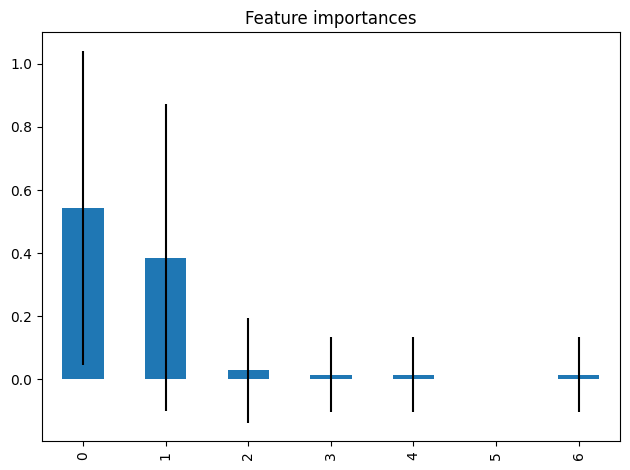

In [61]:
### quality 60% random forest importances

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_dirt_60[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_dirt_60 = clf.fit(X, df_dirt_60[name_class])
importances_1 = df_dirt_60.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_dirt_60.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

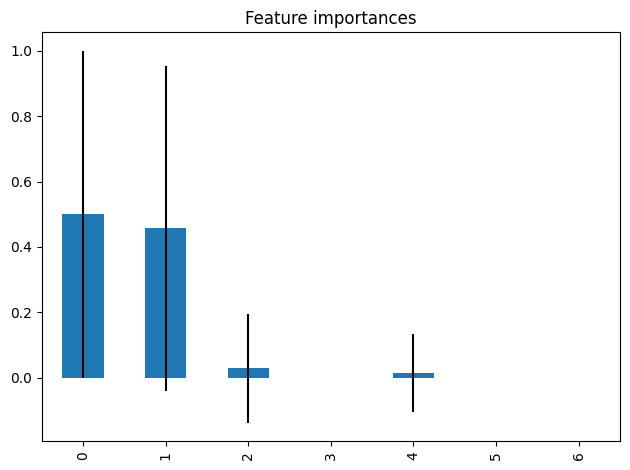

In [62]:
### quality 70% random forest importances

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_dirt_70[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_dirt_70 = clf.fit(X, df_dirt_70[name_class])
importances_1 = df_dirt_70.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_dirt_70.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

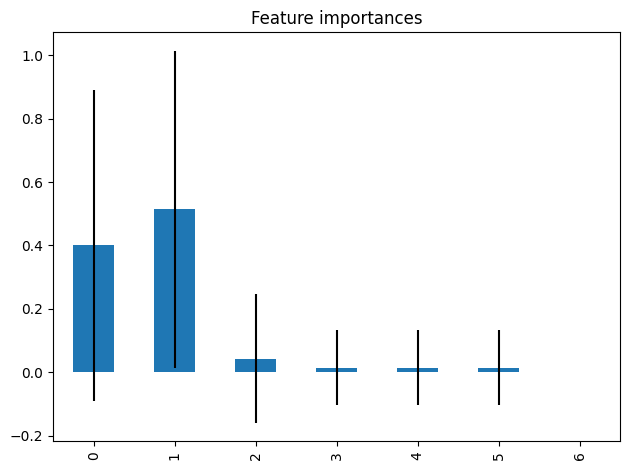

In [63]:
### quality 100% random forest importances

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_100[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_100 = clf.fit(X, df_100[name_class])
importances_1 = df_100.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_100.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [66]:
df_dirt_60 = d.injection(df, name_class, 70/100, 10, 1)
df_dirt_70 = d.injection(df, name_class, 80/100, 10, 1)

df_clean_60 = improve_accuracy(df_dirt_60, 'ZSB', 'ZSB', 'impute_standard', 'impute_standard',
                                           'impute_standard', 'Strength','Intelligence','Weaknesses', name_class)

df_clean_70 = improve_accuracy(df_dirt_70, 'ZSB', 'ZSB', 'impute_standard', 'impute_standard',
                                           'impute_standard', 'Strength','Intelligence','Weaknesses', name_class)

saved dirty dataset 70%
saved dirty dataset 80%


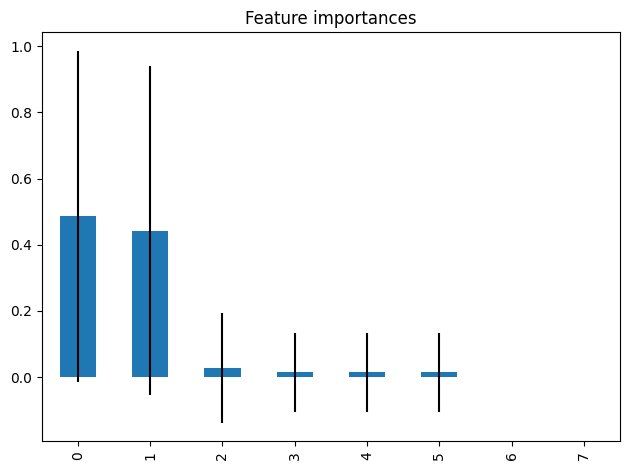

In [67]:
### quality 60%-clean random forest importances

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_clean_60[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_60 = clf.fit(X, df_clean_60[name_class])
importances_1 = df_clean_60.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_clean_60.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

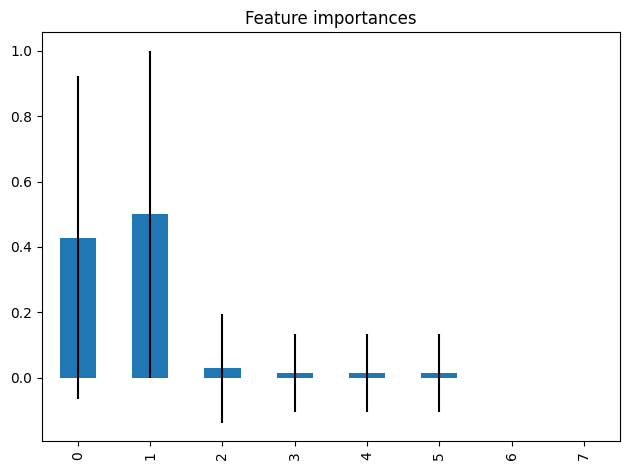

In [68]:
### quality 70%-clean random forest importances

clf = AdaBoostClassifier(n_estimators=param['AdaBoost'])

X = enc(df_clean_70[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_70 = clf.fit(X, df_clean_70[name_class])
importances_1 = df_clean_70.feature_importances_

forest_importances = pd.Series(importances_1)
std = np.std([tree.feature_importances_ for tree in df_clean_70.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()
